In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as BS
import pandas as pd
from urllib.parse import urlparse, urlsplit

webpages = []
webpages2 = []
#Import in URL, use beautifulsoup to parse as an HTML tree
webpages.append('https://globalnews.ca/news/6925742/coronavirus-restrictions-vulnerable-communities/')
webpages.append('https://globalnews.ca/news/6924794/coronavirus-trudeau-covid-19-aid/')
webpages.append('https://globalnews.ca/news/6747519/coronavirus-update-trudeau/')
webpages.append('https://globalnews.ca/news/6747519/coronavirus-update-trudeau/')
webpages.append('https://globalnews.ca/news/6815146/coronavirus-trudeau-april-14/')
webpages.append('https://globalnews.ca/news/6792967/coronavirus-trudeau-speaking-moistly/')
webpages.append('https://globalnews.ca/news/6760764/coronavirus-mps-charities/')
webpages.append('https://globalnews.ca/news/6766838/coronavirus-canada-trudeau/')
webpages.append('https://globalnews.ca/news/6745733/trudeau-coronavirus-update-march-28/')
webpages.append('https://globalnews.ca/news/6820797/trudeau-long-term-care-workers/')
webpages.append('https://globalnews.ca/news/6826929/coronavirus-trudeau-economy-and-canada-u-s-border/')
webpages.append('https://globalnews.ca/news/6694574/coronavirus-trudeau-economic-measures/')
webpages.append('https://globalnews.ca/news/6716919/trudeau-canada-update-coronavirus-march-23/')
webpages.append('https://globalnews.ca/news/6832186/trudeau-coronavirus-china-deaths/')
webpages.append('https://globalnews.ca/news/6724070/coronavirus-canada-economic-measures-vote/')

webpages2.append('https://globalnews.ca/news/6982002/coroanvirus-trump-fact-check/')
webpages2.append('https://globalnews.ca/news/6973012/coronavirus-donald-trump-reopening-science/')
webpages2.append('https://globalnews.ca/news/7004071/trump-world-health-organization-china/')
webpages2.append('https://globalnews.ca/news/6956812/coronavirus-trump-hydroxychloroquine-covid/')
webpages2.append('https://globalnews.ca/news/6926565/coronavirus-trump-congress-covid-19/')
webpages2.append('https://globalnews.ca/news/6884640/coronavirus-trump-social-distancing-guidelines/')
webpages2.append('https://globalnews.ca/news/6876069/coronavirus-us-trump-testing/')
webpages2.append('https://globalnews.ca/news/6953079/donald-trump-coronavirus-legal-powers/')
webpages2.append('https://globalnews.ca/news/6962311/coronavirus-trump-hydroxychloroquine-defence/')
webpages2.append('https://globalnews.ca/news/6881102/coronavirus-trump-airline-screening/')
webpages2.append('https://globalnews.ca/news/6952098/us-coronavirus-new-aid-house/')
webpages2.append('https://globalnews.ca/news/6931168/trump-coronavirus-outbreaks/')

#contain list of webpages within array
webpages

In [ ]:
all_articles = []
all_articles2 = []
for webpage in webpages:
    page = urlopen(webpage)
    html_src = BS(page)
    all_blurbs = ''
    for blurb in html_src.find_all('p'):
        all_blurbs = all_blurbs + blurb.text
    all_articles.append(all_blurbs)
for webpage in webpages2:
    page = urlopen(webpage)
    html_src = BS(page)
    all_blurbs = ''
    for blurb in html_src.find_all('p'):
        all_blurbs = all_blurbs + blurb.text
    all_articles2.append(all_blurbs)

In [ ]:
df = pd.DataFrame(all_articles, columns=['Articles'])
df.to_csv('covid.csv', sep='\t', encoding='utf-8')

df2 = pd.DataFrame(all_articles2, columns=['Articles'])
df2.to_csv('covid2.csv', sep='\t', encoding='utf-8')

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys, email, re

df = pd.read_csv('covid.csv', error_bad_lines=False)
data = df['\tArticles']
data = data.dropna(axis=0, how='any')

df2 = pd.read_csv('covid2.csv', error_bad_lines=False)
data2 = df2['\tArticles']
data2 = data2.dropna(axis=0, how='any')
data.head(n=180)

0     0\t"Want to discuss? Please read our Commentin...
1                               \t\t\tREAD MORE: \t\t\t
2     \t\t\t\tCoronavirus: Hasty re-opening could se...
3     “I understand the economic pressures we’re all...
4     \t\t\t\tCoronavirus: No easy fix for problems ...
                            ...                        
72    Canada’s Foreign Affairs Minister François-Phi...
73    13\tWant to discuss? Please read our Commentin...
74    14\t"Want to discuss? Please read our Commenti...
75    \t\t\t\tLiberals say changes coming to emergen...
76    Conservative Leader Andrew Scheer has said the...
Name: \tArticles, Length: 77, dtype: object

In [2]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 1500)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head(n=20)


,10,11,12,13,130,14,150,17,19,192m,200,45,50,67,72,75,82,abortion,abroad,access,according,act,added,additional,affairs,affected,agency,aid,aimed,airlines,airport,alleged,allow,amid,anand,andrew,anita,announced,anytime,apply,approval,approved,arctic,arrested,association,authorities,automatic,away,banks,banned,bans,battle,better,big,billion,billions,boarding,border,breathing,briefing,bubble,businesses,bylaw,cabinet,calls,canada,canadian,canadians,cancel,care,case,cases,cent,champagne,changes,charities,charity,chernobyl,chief,china,circumference,citizens,city,clarified,climbed,clock,cmhc,come,coming,commenting,commercial,commons,communities,community,concealed,concerned,conditions,confinement,congregating,conservative,conservatives,contain,continue,coronavirus,cost,cottage,count,country,coverup,covid,covidiots,credible,crisis,critical,criticism,cruise,curve,custodians,daily,damage,dangers,days,deal,death,deaths,decisions,deemed,deferrals,dene,denied,devastating,devastation,developing,didn,different,dire,discount,discuss,discussions,disease,disobeying,distance,distancing,distributor,domestic,donate,donates,doug,earners,easing,easy,economic,economy,effort,eligible,emergencies,emergency,emerging,employee,employees,employment,enforce,ensuing,epidemic,et,europe,evaded,evening,event,evident,exceptional,extent,extraordinary,facilities,failed,far,fatality,fear,federal,feds,fined,fix,flights,flouting,following,forcing,ford,foreign,françois,freeze,friday,funding,gatherings,glove,going,government,grim,guarantee,guidelines,half,halifax,happening,hasty,haven,health,help,helping,hit,homes,house,hundreds,ideally,ignorant,illness,impacts,imported,include,income,increase,increased,indigenous,infected,inject,inside,insure,intercity,invincible,iq,isn,jump,juncture,jurisdictions,just,justin,knows,la,latest,leader,leaders,legislation,legislative,let,liberal,liberals,lifted,lighten,like,limit,limits,linked,...,million,minister,mitigate,moistly,moment,money,montreal,mood,morning,mortgage,mortgages,mps,n95,nearly,necessary,need,needed,needlessly,negotiations,new,newsletter,north,northern,novel,numbers,nurses,nursing,occur,office,officer,official,officially,officials,ongoing,ontario,opec,opening,operating,operator,option,orders,outbreak,outside,package,painted,pandemic,parks,parliament,parliamentary,parts,pass,passenger,patient,paying,payment,pearson,people,percent,phac,pharmacists,philippe,physical,picture,plan,plane,planned,point,police,policy,pondered,populations,positive,possible,potential,power,powers,premier,prepared,preparedness,presents,pressure,pressures,prevents,previously,prime,problems,procurement,projection,projections,promises,promising,proposed,protection,provide,providers,public,quarantine,quebec,question,questions,quickly,rail,raising,rate,read,really,received,reconvene,refund,region,release,remain,remains,remarks,reminded,reminding,remote,reopening,repatriate,reporters,reports,require,residents,response,restrictions,revised,rideau,round,route,routes,safe,safety,said,salaries,saskatchewan,saturday,say,says,scheer,scofflaws,screening,second,securities,seen,send,seniors,separate,services,set,severity,shaming,ship,shortages,showing,sign,signs,single,situation,sized,slow,small,smarten,social,socially,soon,source,speaking,spend,spending,spike,spread,standard,standards,statement,states,stay,stranded,stressed,sub,subject,subsidies,subsidy,suffocating,suggests,supplies,support,sure,suspended,sweeping,symptoms,table,taken,taking,tam,taxes,tell,term,territories,tests,think,thousands,thursday,tightening,times,tolerance,toll,tories,toronto,touch,train,trains,travellers,trip,trudeau,tuesday,turkmenistan,underestimate,understand,unfathomable,unfit,united,update,updates,urged,use,vaccine,vigilant,village,virus,visible,vulnerable,wage,want,war,warned,watchdog,ways,wearing,wednesday,week,weekend,weeks,word,work,working,world,worried,worsen,worst,wuhan
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.115290,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0

In [12]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 1500)

tf_idf2 = tf_idf_vectorizor.fit_transform(data2)
tf_idf_norm2 = normalize(tf_idf2)
tf_idf_array2 = tf_idf_norm2.toarray()

pd.DataFrame(tf_idf_array2, columns=tf_idf_vectorizor.get_feature_names()).head(n=20)

,10,11,19,1m,1st,2019,20m,29,3t,400,412,500b,able,absolutely,access,action,address,adjust,administration,advisers,agencies,agent,aggressively,agreements,aid,aide,aides,aimed,airlines,alarm,alert,alleged,america,americans,amid,analysis,announced,annual,answering,anthony,apparent,appropriate,april,areas,arthritis,asked,assert,asserted,attempt,attention,authority,available,awaiting,backed,based,beat,believed,believes,best,biden,big,billion,bills,blueprint,borne,breach,breaking,briefings,businesses,calling,calls,campaign,canada,capitol,care,carefully,carrying,cases,caught,cautioned,cent,certain,challenges,checks,china,chinese,clashes,clinical,clinton,coins,combination,combined,comes,coming,commended,commenting,common,community,compared,concern,concerns,conduct,congratulate,congress,congressional,consider,considering,control,coronavirus,cost,costs,country,covid,crisis,criticism,crowds,cure,cusma,cyberattack,daily,dangerous,day,daylong,days,dead,death,deaths,debate,decades,declared,defended,defends,deliver,democrat,democratic,democrats,department,depicted,desire,despite,determined,develop,did,differences,diplomat,disaster,discovered,discuss,disinfectant,disinfectants,dismissed,dispatched,distancing,documents,doesn,doing,donald,double,dr,drink,drops,drug,drugs,duties,earlier,easing,economic,economy,edged,edwards,effects,effort,election,emails,emerge,emergency,emphatically,encouraged,enemy,enormous,era,especially,estimate,evidence,expected,experts,expire,explore,extending,eye,eyes,facilities,facts,failed,falls,false,far,fatal,fauci,federal,fight,financial,findings,finds,firestorm,flights,flip,focus,food,fraud,freeze,friday,funding,funds,future,gift,global,glut,goes,going,golfing,gop,government,governments,governors,gradual,greatly,grimmer,groups,guidelines,handling,harm,health,heavily,help,helpful,higher,highlight,hillary,hong,hospital,hot,house,howard,hurt,hydroxychloroquine,ignored,illness,impact,importance,...,outside,overly,page,painted,painting,pandemic,pandemics,partial,passes,patients,pead,pelosi,pence,people,permanent,person,peter,phase,picture,pitches,pivot,place,places,plot,point,poison,policies,policy,popping,positive,possibility,possible,potential,potentially,powered,powers,precautions,precursor,preliminary,prepare,prescribed,president,presidential,pressing,prevent,preventing,preventive,price,prior,private,problem,process,professionals,prompted,prospective,protect,protective,provisions,public,publicly,pull,quarantine,quarter,raising,rallies,range,rare,rate,read,real,recession,recommended,reduced,referring,reforms,regulators,released,relief,relying,remarks,renew,reopen,reopening,repeatedly,reporting,reports,requested,requiring,research,researchers,resolution,respond,restrictions,result,results,resurgence,revealed,revelation,reversal,riff,rise,risk,risks,rogue,role,rosy,rules,rush,safer,said,says,scale,scene,schools,science,scientists,secretary,security,selling,senators,set,settings,severe,shocked,shop,shots,shown,shrank,slightly,slow,social,solve,sources,souvenir,spark,special,spike,spotlight,spots,spread,stage,standard,started,state,statement,states,statistical,status,stave,stepped,steps,stern,stockpile,stop,strategy,strzok,studies,study,suggest,summer,sunday,supporters,surpass,surprise,sweeping,switch,sword,tag,taking,talks,tax,technically,telecommunications,tells,temperature,tensions,testing,tests,text,things,think,threatens,thursday,ties,time,toll,total,toxic,travellers,treading,treat,treatment,tries,triggered,trillion,true,trump,trust,try,trying,tuesday,turned,undercut,undergo,undermining,unexpected,unless,unproven,unveiled,unveils,urgent,urges,use,used,va,ventilators,veterans,vietnam,virus,votes,voting,vs,want,wanted,wants,war,warned,warning,warns,wasn,way,wednesday,week,weeks,welcomed,white,wide,wilkie,withdrawal,wonders,working,works,world,worry,worship,wouldn,wrong,year,years,york
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.

In [3]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [5]:
from sklearn.cluster import KMeans 
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array) #vectorized data to be fitted using KMeans 
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm='auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn) #estimate centroid locations as per captured data

Y_sklearn

array([[ 0.27985982, -0.07585786],
       [ 0.26797213,  0.0022848 ],
       [-0.0846922 , -0.04445823],
       [-0.02254408, -0.11459027],
       [-0.17224006,  0.18160211],
       [-0.0951706 , -0.09772858],
       [-0.15452053,  0.20593225],
       [-0.16228683,  0.14428637],
       [ 0.28085613,  0.30365723],
       [-0.08003905, -0.06049902],
       [-0.03125422, -0.08327683],
       [ 0.72852467,  0.11730315],
       [-0.28997373,  0.60367866],
       [-0.23901716,  0.56884888],
       [ 0.72852467,  0.11730315],
       [-0.28997373,  0.60367866],
       [-0.23901716,  0.56884888],
       [ 0.32953988,  0.15498965],
       [-0.10542828, -0.13991123],
       [-0.08174641, -0.11708542],
       [-0.09891047, -0.01161884],
       [-0.06070352, -0.22161421],
       [ 0.55261389,  0.10708935],
       [-0.14192114, -0.2935247 ],
       [-0.08854718, -0.10083162],
       [-0.10015909, -0.03521086],
       [-0.00437116, -0.06947917],
       [ 0.3838173 ,  0.02811756],
       [-0.10614062,

In [13]:
from sklearn.cluster import KMeans 
sklearn_pca = PCA(n_components=2)
Y_sklearn2 = sklearn_pca.fit_transform(tf_idf_array2)
kmeans2 = KMeans(n_clusters=2, max_iter=600, algorithm='auto')
fitted2 = kmeans2.fit(Y_sklearn2)
prediction2 = kmeans.predict(Y_sklearn2)


In [6]:
from scipy.stats import multivariate_normal as mvn
class GMM:
    def __init__(self, C, n_runs):
        self.C = C # number of Guassians/clusters
        self.n_runs = n_runs
        
    
    def get_params(self):
        return (self.mu, self.pi, self.sigma)
#Calculate weights (params per gaussian), mean cov matrices given kmeans init
    
#Applied to calc feature params (known vals of EM, x) such that GMM can adjust shape (cov, mean of clusters per each gaussian) for each added sample

    def calculate_mean_covariance(self, X, prediction):
#Prediction is cluster labels from kmeans, X is data points due to features
        
#Return init_means and init_cov for E-step to later find values per observed variables

        d = X.shape[1] #ret all features across cols; rows of data rep unique samples
        labels = np.unique(prediction)
        self.initial_means = np.zeros((self.C, d)) #per each cluster across all features, init zero distance to mean
        self.initial_cov = np.zeros((self.C, d, d)) #per each cluster across all features, init zero cov from mean
        self.initial_pi = np.zeros(self.C) #probability distribution of data across C clusters
        counter=0
#Keep in mind each sample is vector of size d containing d features, data points shown use PCA to reduce dimensionality and present each SAMPLE as a dot on plot, but do keep in mind it is infact a vec
    
#Compute mean per sample across feature space, store in array, and covariance per sample across feature space, store in 2D array

        for label in labels:
            ids = np.where(prediction == label) #take data points belonging to one of k clusters at a time
            self.initial_pi[counter] = len(ids[0]) / X.shape[0] #num samples per cluster divided over total of samples: probability distributed per cluster
            self.initial_means[counter,:] = np.mean(X[ids], axis = 0) #calc mean per each sample (across all features) and populate per each cluster across cols
            de_meaned = X[ids] - self.initial_means[counter,:] #compute difference b/w each feature from cluster's samples from average per sample, across all samples
            Nk = X[ids].shape[0] #collect all samples as total data points in curr gaussian
        
#Transpose collects ALL samples per single feature via de_meaned.T, meaning all variances (distance from mean) per feature, will get multiplied across variances per every other feature
        
#Mathematical defn of covariance, then divide all covariances per sample by number of datapoints per cluster to normalize, process will repeat over entire sample space given matrix ops to form cov matrix
    
            self.initial_cov[counter,:, :] = np.dot(self.initial_pi[counter] * de_meaned.T, de_meaned) / Nk
            counter+=1
        assert np.sum(self.initial_pi) == 1    
        return (self.initial_means, self.initial_cov, self.initial_pi)
    
    def _initialise_parameters(self, X):
        n_clusters = self.C
        kmeans = KMeans(n_clusters= n_clusters, init="k-means++", max_iter=500, algorithm = 'auto')
        fitted = kmeans.fit(X)
        prediction = kmeans.predict(X)
        self._initial_means, self._initial_cov, self._initial_pi = self.calculate_mean_covariance(X, prediction)
        return (self._initial_means, self._initial_cov, self._initial_pi)
        
        
#E-step applies params and sample data to calculate posterior (observed vals) per cluster, then normalize to ensure probabilities per sample points sum to 1. Posterior a func of gamma that determines likelihood of nth observed val belonging to kth cluster. Provide k distributions of observed vals, each defined by func gamma. Gamma distributions applied in M-step to optimise cov, mean params per gaussian clusters.
#Parameters:
#X: sample points - N x d (N unobserved var, d samples)
#m: num features
#pi: weights of mix comp (prob distribution per gaussian clusters) - C clusters
#mu: means per gaussian - C x d
#sigma: cov per gauss - C x d x d
#Return:gamma: likelihood distribution of unobserved var belonging to one of k clusters - N x C. Unobserved var ARE the samples (word importance/topics), unknown before model runs, shape clusters dep which chosen; features (words) can be found by searching corpus. Gamma distribution used in KL-divergence to fit data to it (samples) by params of gaussian repeatedlyuntil optimal distribution between features (words) and samples (articles/topics)
        
    def _e_step(self, X, pi, mu, sigma):
        N = X.shape[0] 
        self.gamma = np.zeros((N, self.C))

        const_c = np.zeros(self.C)
        
        
        self.mu = self.mu if self._initial_means is None else self._initial_means
        self.pi = self.pi if self._initial_pi is None else self._initial_pi
        self.sigma = self.sigma if self._initial_cov is None else self._initial_cov

        for c in range(self.C):
            # Posterior Distribution using Bayes Rule
            #Update per each cluster, compute prob density func per each cluster to defn which samples belong where
            self.gamma[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])

        # normalize across columns to make a valid probability
        gamma_norm = np.sum(self.gamma, axis=1)[:,np.newaxis]
        self.gamma /= gamma_norm

        return self.gamma
    
#Gamma function results can update priors, cov and mean matrices and adjust GMM distribution
#Parameters: X: data - N x d (samples by features), gamma: posterior distribution of lower bound - N x C (samples by clusters). Given observed samples can compute prob of features (words) belonging to each cluster, mean and cov to check which words strongly correlate with cluster
#Returns: pi: C, mu: C x d, sigma: C x d x d 
    def _m_step(self, X, gamma):
        N = X.shape[0] 
        C = self.gamma.shape[1] 
        d = X.shape[1] 

#Compute mean across clusters and determine contribution from each gaussian
        self.pi = np.mean(self.gamma, axis = 0)
#Apply mat prod to convert samples associated w/ clusters to features associated w/ clusters then divide over all samples to compute NEW mean!

#In denominator convert 1D arr of sum to a col vec for mat prod to work

        self.mu = np.dot(self.gamma.T, X) / np.sum(self.gamma, axis = 0)[:,np.newaxis]
#Compute updated cov matrices per each cluster
        for c in range(C):
            x = X - self.mu[c, :] # (N x d)
            
            gamma_diag = np.diag(self.gamma[:,c])
            x_mu = np.matrix(x)
            gamma_diag = np.matrix(gamma_diag)

            sigma_c = x.T * gamma_diag * x
            self.sigma[c,:,:]=(sigma_c) / np.sum(self.gamma, axis = 0)[:,np.newaxis][c]

        return self.pi, self.mu, self.sigma
    
    
    def _compute_loss_function(self, X, pi, mu, sigma):
        N = X.shape[0]
        C = self.gamma.shape[1]
        self.loss = np.zeros((N, C))
        for c in range(C):
            dist = mvn(self.mu[c], self.sigma[c],allow_singular=True)
            self.loss[:,c] = self.gamma[:,c] * (np.log(self.pi[c]+0.00001)+dist.logpdf(X)-np.log(self.gamma[:,c]+0.000001))
        self.loss = np.sum(self.loss)
        return self.loss
    
    
    
    def fit(self, X):
        d = X.shape[1]
        self.mu, self.sigma, self.pi =  self._initialise_parameters(X) 
        try:
            for run in range(self.n_runs):  
                self.gamma  = self._e_step(X, self.mu, self.pi, self.sigma)
                self.pi, self.mu, self.sigma = self._m_step(X, self.gamma)
                loss = self._compute_loss_function(X, self.pi, self.mu, self.sigma)
                if run % 10 == 0:
                    print("Iteration: %d Loss: %0.6f" %(run, loss))
        except Exception as e:
            print(e)
            
        
        return self
    
    def predict(self, X):
        labels = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            labels [:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
        labels  = labels .argmax(1)
        return labels 
    
    def predict_proba(self, X):
        post_proba = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            # Posterior Distribution using Bayes Rule, try and vectorise
            post_proba[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
    
        return post_proba

Iteration: 0 Loss: 192.164946
Iteration: 10 Loss: 210.507971
Iteration: 20 Loss: 210.515528


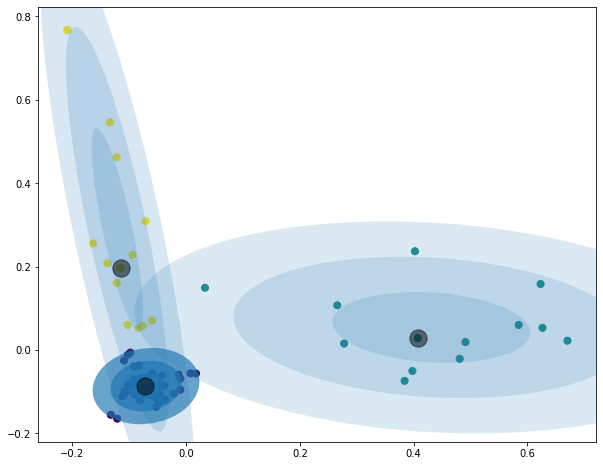

In [14]:
model2 = GMM(3, n_runs = 30)

fitted_values2 = model2.fit(Y_sklearn2)
predicted_values2 = model2.predict(Y_sklearn2)

centers = np.zeros((3,2))
for i in range(model2.C):
    density = mvn(cov=model2.sigma[i], mean=model2.mu[i]).logpdf(Y_sklearn2)
    centers[i, :] = Y_sklearn2[np.argmax(density)]

plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn2[:, 0], Y_sklearn2[:, 1],c=predicted_values2,s=50, cmap='viridis', zorder=1)

plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.5, zorder=2);

w_factor = 0.2 / model2.pi.max()
for pos, covar, w in zip(model2.mu, model2.sigma, model2.pi):
    draw_ellipse(pos, covar, alpha = w)
    

Iteration: 0 Loss: 126.388477
Iteration: 10 Loss: 135.072012
Iteration: 20 Loss: 135.072763


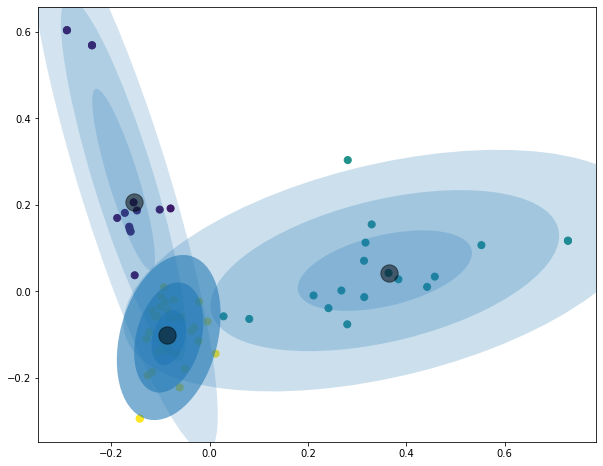

In [7]:
model = GMM(3, n_runs = 30)

fitted_values = model.fit(Y_sklearn)
predicted_values = model.predict(Y_sklearn)

# # compute centers as point of highest density of distribution
centers = np.zeros((3,2))
for i in range(model.C):
    density = mvn(cov=model.sigma[i], mean=model.mu[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]
    
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=predicted_values ,s=50, cmap='viridis', zorder=1)

plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.5, zorder=2);

w_factor = 0.2 / model.pi.max()
for pos, covar, w in zip(model.mu, model.sigma, model.pi):
    draw_ellipse(pos, covar, alpha = w)

In [8]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) #match feature to cluster
        x_means = np.mean(tf_idf_array[id_temp], axis=0) #return average score per cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] #iterate through mean per every dim, meaning after all samples of distribution taken per word, next word analyzed and gets done over all rows (samples per word) to number of words (cols) defined by n_feats; limit for top words; use argsort to idetnify top features by TF-IDF score
        features = tf_idf_vectorizor.get_feature_names()
        best_features=[(features[i], x_means[i]) for i in sorted_means] #create arr of tuples w/ names & corresponding TF-IDF per top cluster features (words)
        df = pd.DataFrame(best_features, columns=['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 20)

dfs[0].values.flatten().tolist()

['canada',
 0.2979489807767629,
 'coronavirus',
 0.12109663422117568,
 'like',
 0.10010795042377892,
 'country',
 0.08381204379782936,
 'battle',
 0.05878779342665514,
 'official',
 0.05878779342665514,
 'juncture',
 0.05878779342665514,
 'critical',
 0.05481602010098378,
 'amid',
 0.05141196995137541,
 'health',
 0.0511380218645952,
 'working',
 0.040812049162542996,
 'eligible',
 0.036901279663457874,
 'apply',
 0.036901279663457874,
 '67',
 0.034527573157716894,
 'climbed',
 0.034527573157716894,
 'count',
 0.034527573157716894,
 'case',
 0.034527573157716894,
 'easy',
 0.03383943891889877,
 'problems',
 0.03383943891889877,
 'nursing',
 0.03383943891889877]

In [17]:
df2 = get_top_features_cluster(tf_idf_array2, predicted_values2, 20)
df2[0].values.flatten().tolist()

['coronavirus',
 0.062118660678343325,
 'trump',
 0.055792376557444116,
 'going',
 0.03397628254946614,
 'disinfectant',
 0.023725512146110735,
 'testing',
 0.02343381293880614,
 'll',
 0.02324487913588797,
 'emergency',
 0.022353357111858114,
 'dismissed',
 0.02057448392452039,
 'aid',
 0.018886692895053795,
 'new',
 0.017302459410119327,
 'studies',
 0.01718649569318157,
 'hong',
 0.016930555539270507,
 'kong',
 0.016930555539270507,
 'voting',
 0.016001975005095672,
 'time',
 0.015782180356373278,
 'china',
 0.015277031184828439,
 'said',
 0.014966749256321419,
 'state',
 0.014753402646241283,
 'think',
 0.013581267858355922,
 'white',
 0.013555857070834574]

Text(0.5, 1.0, 'Trudeau cluster 0')

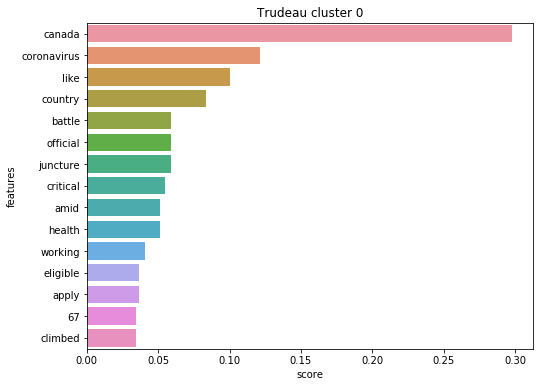

In [9]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient='h', data=dfs[0][:15]).set_title('Trudeau cluster 0') #x & y must match cols defn in df

Text(0.5, 1.0, 'Trudeau cluster 1')

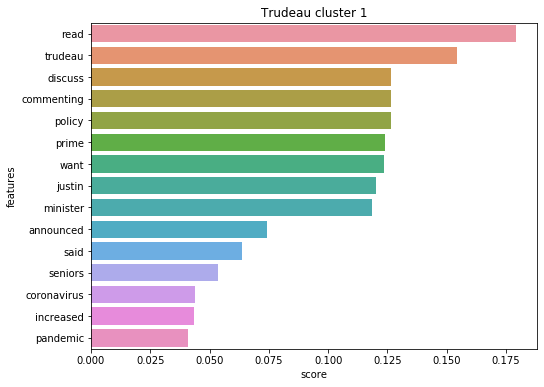

In [10]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient='h', data=dfs[1][:15]).set_title('Trudeau cluster 1') #x & y must match cols defn in df

Text(0.5, 1.0, 'Trudeau cluster 2')

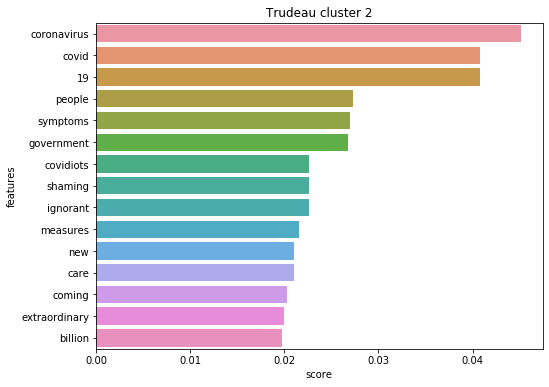

In [11]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient='h', data=dfs[2][:15]).set_title('Trudeau cluster 2') #x & y must match cols defn in df

Text(0.5, 1.0, 'Trump cluster 0')

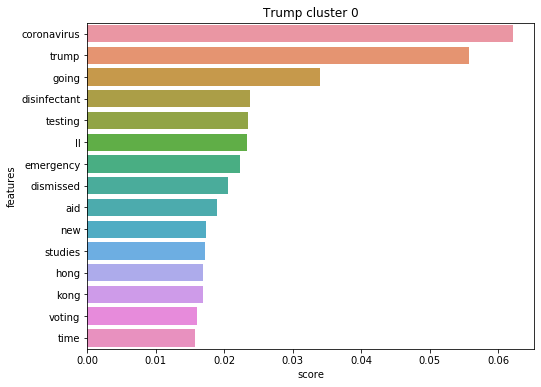

In [18]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient='h', data=df2[0][:15]).set_title('Trump cluster 0') #x & y must match cols defn in df

Text(0.5, 1.0, 'Trump cluster 1')

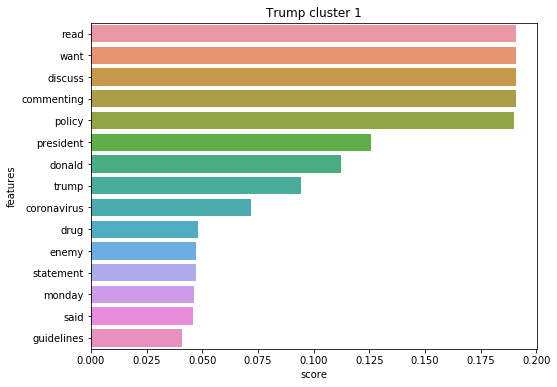

In [19]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient='h', data=df2[1][:15]).set_title('Trump cluster 1') #x & y must match cols defn in df

Text(0.5, 1.0, 'Trump cluster 2')

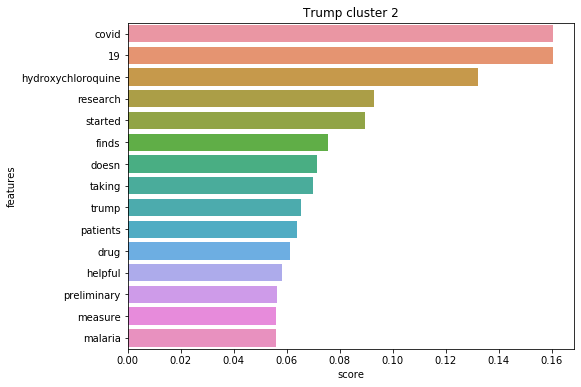

In [20]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient='h', data=df2[2][:15]).set_title('Trump cluster 2') #x & y must match cols defn in df

In [21]:
from pymongo import MongoClient
client = MongoClient('localhost',27017)
db = client['top_words'] #create db called top_words, later can add documents to it (tables)
clusters = db.clusters
cluster_data = {
    'Cluster 1': dfs[0].values.flatten().tolist(), 
    'Cluster 2': dfs[1].values.flatten().tolist(),
    'Cluster 3': dfs[2].values.flatten().tolist(),
    'Leader': 'Trudeau'
}
result = clusters.insert_one(cluster_data)
print('One post: {0}'.format(result.inserted_id))

One post: 5edd523a53d219808a56f1af


In [22]:
trudeau_data = clusters.find_one({'Leader':'Trudeau'})
trudeau_data

{'_id': ObjectId('5edc2eb5116b7b0103e38253'),
 'Cluster 1': ['coronavirus',
  0.044059876556640225,
  '19',
  0.03255517015077857,
  'covid',
  0.03255517015077857,
  'symptoms',
  0.0298064491030523,
  'government',
  0.02444890353595527,
  'people',
  0.02436961034032663,
  'shaming',
  0.020328944066597784,
  'covidiots',
  0.020328944066597784,
  'ignorant',
  0.020328944066597784,
  'restrictions',
  0.02,
  'right',
  0.02,
  'monday',
  0.02,
  'measures',
  0.019401473845864076,
  'care',
  0.018984302381180033,
  'new',
  0.018978991000878204,
  'extraordinary',
  0.01832435731526946,
  'coming',
  0.01827167574352362,
  'billion',
  0.018058695384936194,
  'federal',
  0.017704260532102653,
  'homes',
  0.016992345419050318],
 'Cluster 2': ['canada',
  0.3064410917276749,
  'coronavirus',
  0.1382483064655537,
  'like',
  0.09346669521989279,
  'country',
  0.07851214353246465,
  'battle',
  0.05478559282741103,
  'juncture',
  0.05478559282741103,
  'official',
  0.054785592

In [23]:
cluster_data2 = {
    'Cluster 1': df2[0].values.flatten().tolist(),
    'Cluster 2': df2[1].values.flatten().tolist(),
    'Cluster 3': df2[2].values.flatten().tolist(),
    'Leader': 'Trump'
}
result2 = clusters.insert_one(cluster_data2)
trump_data = clusters.find_one({'Leader':'Trump'})
trump_data

{'_id': ObjectId('5edd4e4bd72c6d1732097a4f'),
 'Cluster 1': ['coronavirus',
  0.062118660678343325,
  'trump',
  0.055792376557444116,
  'going',
  0.03397628254946614,
  'disinfectant',
  0.023725512146110735,
  'testing',
  0.02343381293880614,
  'll',
  0.02324487913588797,
  'emergency',
  0.022353357111858114,
  'dismissed',
  0.02057448392452039,
  'aid',
  0.018886692895053795,
  'new',
  0.017302459410119327,
  'studies',
  0.01718649569318157,
  'hong',
  0.016930555539270507,
  'kong',
  0.016930555539270507,
  'voting',
  0.016001975005095672,
  'time',
  0.015782180356373278,
  'china',
  0.015277031184828439,
  'said',
  0.014966749256321419,
  'state',
  0.014753402646241283,
  'think',
  0.013581267858355922,
  'white',
  0.013555857070834574],
 'Cluster 2': ['read',
  0.19084967284382928,
  'want',
  0.19084967284382928,
  'discuss',
  0.19084967284382928,
  'commenting',
  0.19084967284382928,
  'policy',
  0.18989501710903808,
  'president',
  0.12565061524966806,
  '